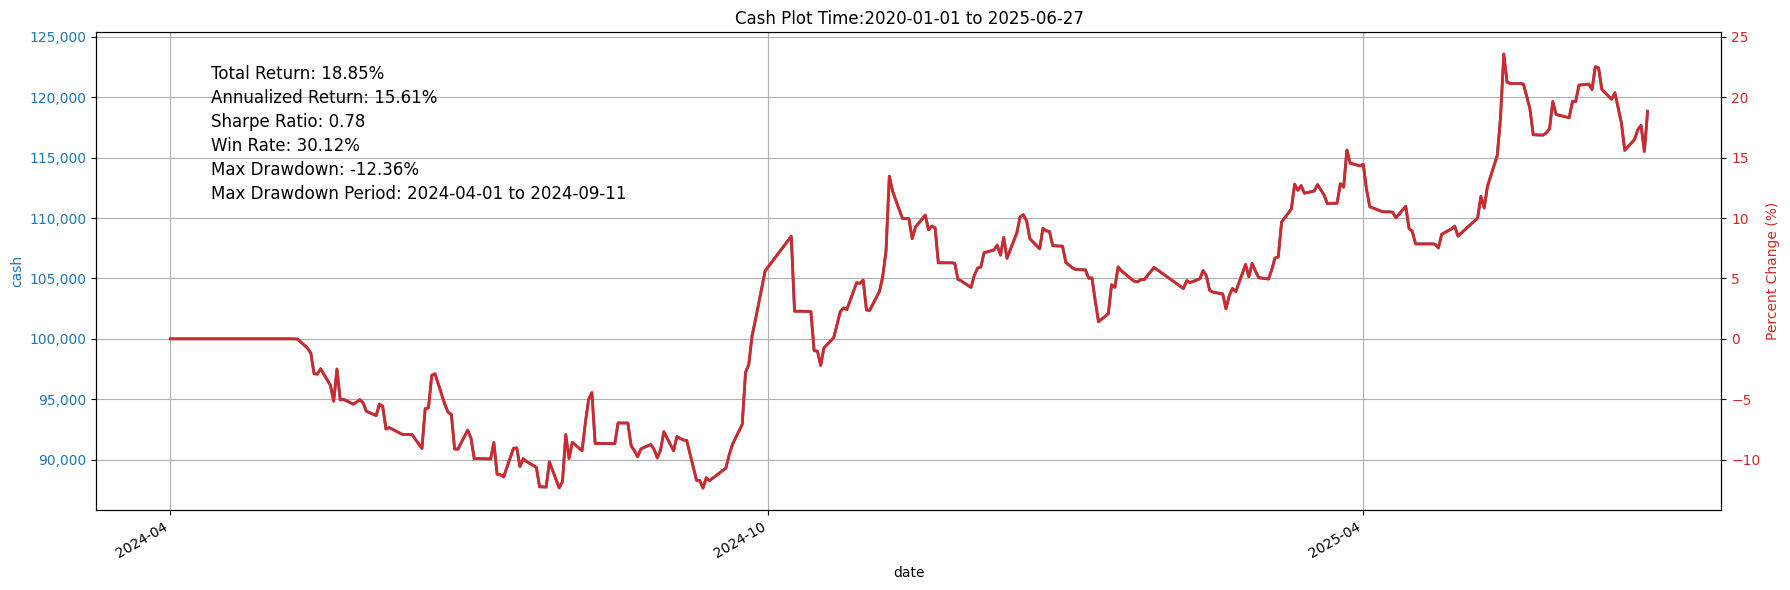

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.dates as mdates

# 定义相关的计算函数

def calculate_total_return(initial_cash, final_cash):
    return (final_cash - initial_cash) / initial_cash

def calculate_annualized_return(total_return, days):
    return (1 + total_return) ** (252 / days) - 1

def calculate_sharpe_ratio(total_cash_log, risk_free_rate=0):
    returns = pd.Series([log['total_cash'] for log in total_cash_log]).pct_change().dropna()
    excess_returns = returns - risk_free_rate / 252  # 假设按252个交易日计算
    sharpe_ratio = (excess_returns.mean() / excess_returns.std()) * (252 ** 0.5)
    return sharpe_ratio

def calculate_win_rate(trade_log):
    wins = 0
    total_trades = 0
    for idx, trade in trade_log.iterrows():
        if trade['action'] == 'sell':
            # 找到对应的买入交易
            buy_price = trade_log[(trade_log['stock'] == trade['stock']) & 
                                  (trade_log['action'] == 'buy') & 
                                  (trade_log['date'] < trade['date'])]['price'].iloc[-1]
            if trade['price'] > buy_price:
                wins += 1
            total_trades += 1
    return wins / total_trades if total_trades > 0 else 0

def calculate_max_drawdown(total_cash_log):
    total_cash_series = pd.Series([log['total_cash'] for log in total_cash_log])
    rolling_max = total_cash_series.cummax()
    drawdowns = (total_cash_series - rolling_max) / rolling_max
    max_drawdown = drawdowns.min()
    return max_drawdown

def calculate_max_drawdown_period(total_cash_log):
    total_cash_series = pd.Series([log['total_cash'] for log in total_cash_log])
    rolling_max = total_cash_series.cummax()
    drawdowns = (total_cash_series - rolling_max) / rolling_max
    max_drawdown_idx = drawdowns.idxmin()
    max_drawdown_start_idx = total_cash_series[:max_drawdown_idx].idxmax()
    start_date = total_cash_log[max_drawdown_start_idx]['date']
    end_date = total_cash_log[max_drawdown_idx]['date']
    return pd.to_datetime(start_date).strftime('%Y-%m-%d'), pd.to_datetime(end_date).strftime('%Y-%m-%d')

# 读取资金曲线文件
file_path = r'C:\Python\Vanyosr_Strategy\Daily_Signal\total_cash_log.csv'
data = pd.read_csv(file_path)

# 读取交易记录文件
trade_log_file_path = r'C:\Python\Vanyosr_Strategy\Daily_Signal\trade_log.csv'
trade_log = pd.read_csv(trade_log_file_path)

# 确保 'date' 列是日期格式
data['date'] = pd.to_datetime(data['date'], format='%Y%m%d')

# 从数据中提取最新的日期作为截止日期
last_date = data['date'].max().strftime('%Y-%m-%d')

# 计算百分比涨幅
data['percent_change'] = (data['total_cash'] - data['total_cash'].iloc[0]) / data['total_cash'].iloc[0] * 100

# 计算总收益率、年化收益率、夏普比率、胜率、最大回撤、最大回撤日期区间
initial_cash = data['total_cash'].iloc[0]
final_cash = data['total_cash'].iloc[-1]
total_return = calculate_total_return(initial_cash, final_cash)
annualized_return = calculate_annualized_return(total_return, len(data))
sharpe_ratio = calculate_sharpe_ratio(data.to_dict('records'))
win_rate = calculate_win_rate(trade_log)  # 使用交易记录来计算胜率
max_drawdown = calculate_max_drawdown(data.to_dict('records'))
max_drawdown_start, max_drawdown_end = calculate_max_drawdown_period(data.to_dict('records'))

# 绘制资金曲线图
fig, ax1 = plt.subplots(figsize=(18, 6))

# 绘制现金曲线
color = 'tab:blue'
ax1.set_xlabel('date')
ax1.set_ylabel('cash', color=color)
ax1.plot(data['date'], data['total_cash'], marker='', linestyle='-', linewidth=2, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True)

# 创建第二个 Y轴
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Percent Change (%)', color=color)
ax2.plot(data['date'], data['percent_change'], marker='', linestyle='-', linewidth=2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

# 设置 Y轴的格式，使其不使用科学计数法
ax1.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, p: format(int(x), ',')))

# 设置x轴的刻度定位器和格式化器，以显示每个月的刻度
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=6))  # 每6个月显示一个刻度
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # 格式化日期显示为年-月

# 自动调整x轴的刻度位置，避免拥挤
fig.autofmt_xdate()

# 在图表上方添加文本注释，展示指标数据
plt.figtext(0.12, 0.86, f'Total Return: {total_return:.2%}', fontsize=12, color='black')
plt.figtext(0.12, 0.82, f'Annualized Return: {annualized_return:.2%}', fontsize=12, color='black')
plt.figtext(0.12, 0.78, f'Sharpe Ratio: {sharpe_ratio:.2f}', fontsize=12, color='black')
plt.figtext(0.12, 0.74, f'Win Rate: {win_rate:.2%}', fontsize=12, color='black')
plt.figtext(0.12, 0.70, f'Max Drawdown: {max_drawdown:.2%}', fontsize=12, color='black')
plt.figtext(0.12, 0.66, f'Max Drawdown Period: {max_drawdown_start} to {max_drawdown_end}', fontsize=12, color='black')

# 显示图表
plt.title(f'Cash Plot Time:2020-01-01 to {last_date}')
plt.xticks(rotation=45)
plt.tight_layout()           # 调整布局以适应标签
plt.show()

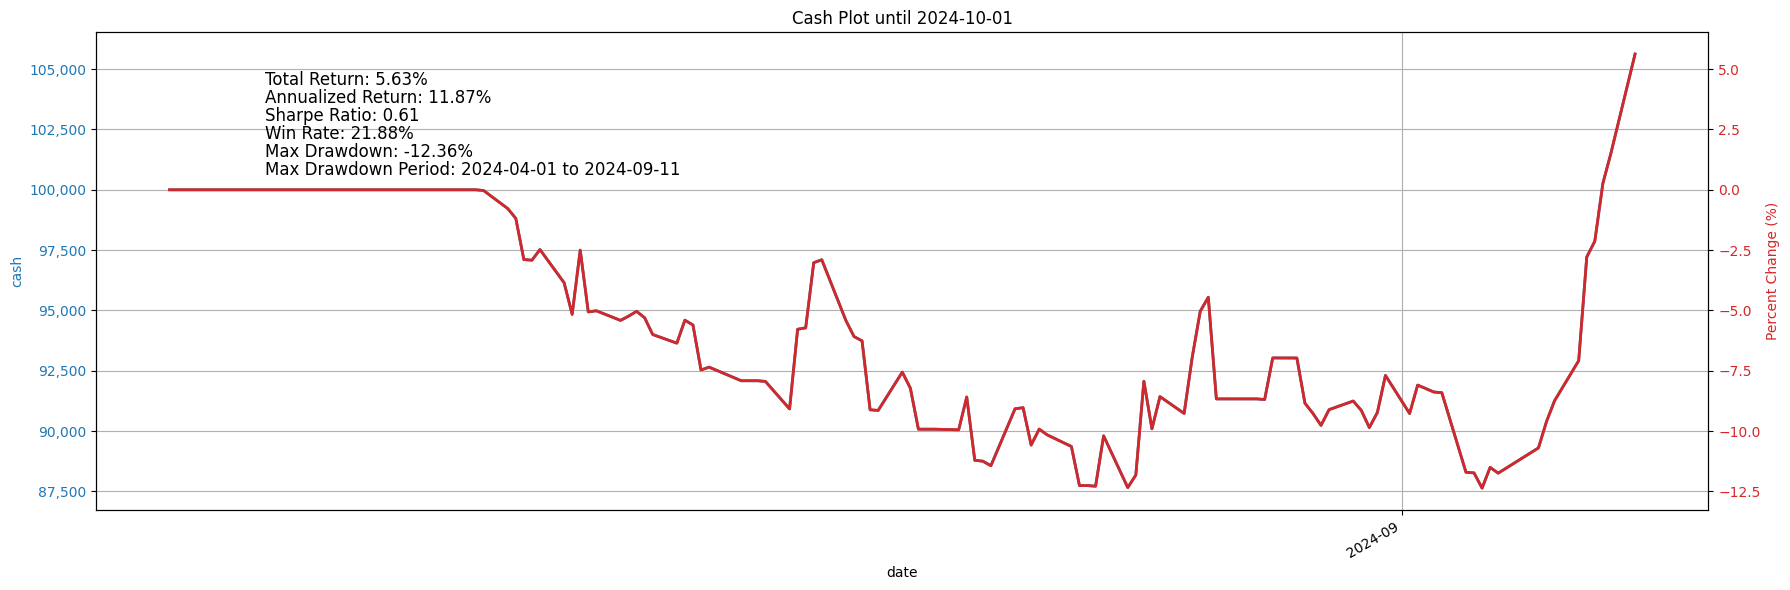

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.dates as mdates

# 定义相关的计算函数

def calculate_total_return(initial_cash, final_cash):
    return (final_cash - initial_cash) / initial_cash

def calculate_annualized_return(total_return, days):
    return (1 + total_return) ** (252 / days) - 1

def calculate_sharpe_ratio(total_cash_log, risk_free_rate=0):
    returns = pd.Series([log['total_cash'] for log in total_cash_log]).pct_change().dropna()
    excess_returns = returns - risk_free_rate / 252  # 假设按 252个交易日计算
    sharpe_ratio = (excess_returns.mean() / excess_returns.std()) * (252 ** 0.5)
    return sharpe_ratio

def calculate_win_rate(trade_log):
    wins = 0
    total_trades = 0
    for idx, trade in trade_log.iterrows():
        if trade['action'] == 'sell':
            # 找到对应的买入交易
            buy_price = trade_log[(trade_log['stock'] == trade['stock']) & 
                                  (trade_log['action'] == 'buy') & 
                                  (trade_log['date'] < trade['date'])]['price'].iloc[-1]
            if trade['price'] > buy_price:
                wins += 1
            total_trades += 1
    return wins / total_trades if total_trades > 0 else 0

def calculate_max_drawdown(total_cash_log):
    total_cash_series = pd.Series([log['total_cash'] for log in total_cash_log])
    rolling_max = total_cash_series.cummax()
    drawdowns = (total_cash_series - rolling_max) / rolling_max
    max_drawdown = drawdowns.min()
    return max_drawdown

def calculate_max_drawdown_period(total_cash_log):
    total_cash_series = pd.Series([log['total_cash'] for log in total_cash_log])
    rolling_max = total_cash_series.cummax()
    drawdowns = (total_cash_series - rolling_max) / rolling_max
    max_drawdown_idx = drawdowns.idxmin()
    max_drawdown_start_idx = total_cash_series[:max_drawdown_idx].idxmax()
    start_date = total_cash_log[max_drawdown_start_idx]['date']
    end_date = total_cash_log[max_drawdown_idx]['date']
    return pd.to_datetime(start_date).strftime('%Y-%m-%d'), pd.to_datetime(end_date).strftime('%Y-%m-%d')

# 读取资金曲线文件
file_path = r'C:\Python\Vanyosr_Strategy\Daily_Signal\total_cash_log.csv'
data = pd.read_csv(file_path)

# 读取交易记录文件
trade_log_file_path = r'C:\Python\Vanyosr_Strategy\Daily_Signal\trade_log.csv'
trade_log = pd.read_csv(trade_log_file_path)

# 确保 'date' 列是日期格式
trade_log['date'] = pd.to_datetime(trade_log['date'], format='%Y%m%d')

# 确保 'date' 列是日期格式
data['date'] = pd.to_datetime(data['date'], format='%Y%m%d')

# 设置资金曲线截止日期（格式: 'YYYY-MM-DD'）
end_date = '2024-10-01'  # 你可以将此日期设置为需要的截止日期

# 过滤数据至截止日期
filtered_data = data[data['date'] <= pd.to_datetime(end_date)].copy()

# 计算百分比涨幅
filtered_data['percent_change'] = (filtered_data['total_cash'] - filtered_data['total_cash'].iloc[0]) / filtered_data['total_cash'].iloc[0] * 100


# 计算总收益率、年化收益率、夏普比率、胜率、最大回撤、最大回撤日期区间
initial_cash = filtered_data['total_cash'].iloc[0]
final_cash = filtered_data['total_cash'].iloc[-1]
total_return = calculate_total_return(initial_cash, final_cash)
annualized_return = calculate_annualized_return(total_return, len(filtered_data))
sharpe_ratio = calculate_sharpe_ratio(filtered_data.to_dict('records'))
win_rate = calculate_win_rate(trade_log.loc[trade_log['date'] <= pd.to_datetime(end_date)])
max_drawdown = calculate_max_drawdown(filtered_data.to_dict('records'))
max_drawdown_start, max_drawdown_end = calculate_max_drawdown_period(filtered_data.to_dict('records'))

# 绘制资金曲线图
fig, ax1 = plt.subplots(figsize=(18, 6))

# 绘制现金曲线
color = 'tab:blue'
ax1.set_xlabel('date')
ax1.set_ylabel('cash', color=color)
ax1.plot(filtered_data['date'], filtered_data['total_cash'], marker='', linestyle='-', linewidth=2, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True)

# 创建第二个 Y轴
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Percent Change (%)', color=color)
ax2.plot(filtered_data['date'], filtered_data['percent_change'], marker='', linestyle='-', linewidth=2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

# 设置 Y轴的格式，使其不使用科学计数法
ax1.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, p: format(int(x), ',')))

# 设置x轴的刻度定位器和格式化器，以显示每个月的刻度
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=6))  # 每6个月显示一个刻度
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # 格式化日期显示为年-月

# 自动调整x轴的刻度位置，避免拥挤
fig.autofmt_xdate()

# 在图表上方添加文本注释，展示指标数据
plt.figtext(0.15, 0.85, f'Total Return: {total_return:.2%}', fontsize=12, color='black')
plt.figtext(0.15, 0.82, f'Annualized Return: {annualized_return:.2%}', fontsize=12, color='black')
plt.figtext(0.15, 0.79, f'Sharpe Ratio: {sharpe_ratio:.2f}', fontsize=12, color='black')
plt.figtext(0.15, 0.76, f'Win Rate: {win_rate:.2%}', fontsize=12, color='black')
plt.figtext(0.15, 0.73, f'Max Drawdown: {max_drawdown:.2%}', fontsize=12, color='black')
plt.figtext(0.15, 0.70, f'Max Drawdown Period: {max_drawdown_start} to {max_drawdown_end}', fontsize=12, color='black')

# 显示图表
plt.title(f'Cash Plot until {end_date}')
plt.xticks(rotation=45)
plt.tight_layout()  # 调整布局以适应标签
plt.show()